In [19]:
using LinearAlgebra, DelimitedFiles, Plots


data2 = readdlm("./data2.txt", ',')
pts = data2[:, 1:2]
lbl = data2[:, 3]

draw_line_by_normal (generic function with 4 methods)

## ب

In [20]:
function perceptron(X, label)
    w = zeros(size(X)[2])
    T = size(X)[1]
    for i = 1:T
        x = X[i, :]
        y = label[i]
        ŷ = sign(w ⋅ x)
        if ŷ != y
            w .+= y * x
        end
    end
    return w
end

perc = perceptron(pts, lbl)

2-element Array{Float64,1}:
 -9.001800000000003
 -6.308800000000002

# ت

In [21]:
function winnow(X, label, η = 0.01)
    w = ones(size(X)[2]) / size(X)[2]
    T = size(X)[1]
    for i = 1:T
        x = X[i, :]
        y = label[i]
        ŷ = sign(w ⋅ x)
        if ŷ != y
            w .*= exp.(η * y * x)
            w ./= sum(w)
        end
    end
    return w
end


wn = winnow(pts, lbl)

2-element Array{Float64,1}:
 0.29413627799552916
 0.7058637220044708

## ج

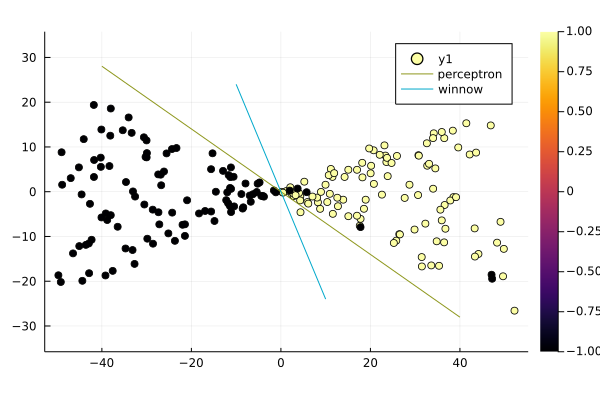

In [26]:
function draw_line_by_normal(plt, v, l = -50, h = 50, title = "")
    f(x) = -v[2] / v[1] * x
    plot!(plt, collect(l:h), f, label = title, linecolor = rand(Int))
end


plt = scatter(pts[:, 1], pts[:, 2], marker_z = lbl, aspect_ratio = 1)
draw_line_by_normal(plt, perc, -40, 40, "perceptron")
draw_line_by_normal(plt, wn, -10, 10, "winnow")
display(plt)
